In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

#### Esercizi svolti da Stefano Polo

#### Matricola: 940175

#### Informazione sulla cartella contenente codici e risultati:
La struttura della cartella così come è presentata è funzionale per una compilazione semplice del *notebook*. Infatti tutti i risultati delle simulazioni sono disposti nella cartella <span style="color:red"> Risultati </span> catalogati in base all'esercizio. Di conseguenza al fine della compilazione del *notebook* non è necessario rieseguire le simulazioni. Nella cartella <span style="color:red">Codici</span> sono catalogati tutti i codici C++ delle simulazioni di ciascun esercizio (in <span style="color:red"> Exercise_08.0</span> si trova il codice con cui ho ottimizzato i parametri $\mu$ e $\sigma$). La compilazione e l'esecuzione di quest'ultimi prevede l'automatica sovrascrittura dei file contenenti i risultati su quelli vecchi contenuti nella cartella <span style="color:red"> Risultati</span> (dunque un'esecuzione dei codici non richiede che i nuovi risultati vengano copiati a mano in <span style="color:red"> Risultati</span>).

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


#### Introduzione all'esercizio
Il *variational* Monte Carlo è una tecnica molto utile per calcolare (approssimare) le proprietà del *ground state* (GS) di un sistema *many-body* (ma anche di stati eccitati se si parte con una funzione d'onda ortogonale al GS).

In questo esercizio si vuole, tramite il principio variazionale, trovare lo stato che meglio approssima il GS a partire da una funzione d'onda di prova parametrica $\Psi_T^{\sigma,\mu}(x)$ che vuole rappresentare una particella nello spazio 1D vincolata dal potenziale:

$$
V(x) = x^4 - \frac{5}{2}x^2 \, .
$$

La funzione d'onda di prova del problema è data dalla seguente espressione:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}} \, .
$$

Dunque facendo variare i parametri $\mu$ e $\sigma$ si vuole minimizzare l'energia:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \, .
$$

Il calcolo del seguente integrale può essere eseguito mediante l'algoritmo Metropolis campionando la distribuzione di probabilità $|\Psi_T(x)|^2$.
Un modo per rendere più semplici i conti è quello di riscrivere l'espressione:

$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{{\left(\hat T+ \hat V\right)} \Psi_T(x)}{\Psi_T(x)} = \frac{{\hat T} \Psi_T(x)}{\Psi_T(x)}+\hat V \, ,
$$

dove nell'ultima uguaglianza è garantita dal fatto che il potenziale è un osservabile diagonale.
Dunque per la stima di $\hat T \Psi_T(x)$ è richiesto di calcolare il laplaciano della funzione d'onda: 

$$
\frac{d^2\Psi_T^{\sigma,\mu}(x)}{dx^2} \propto  -\frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}{\sigma^2} -\frac{e^{-\frac{(x+\mu)^2}{2\sigma^2}}}{\sigma^2}+\frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}\left(x-\mu\right)^2}{\sigma^4}+\frac{e^{-\frac{(x+\mu)^2}{2\sigma^2}}\left(x+\mu\right)^2}{\sigma^4} \, .
$$


### Exercise 08.1
Per il calcolo di $\langle {\hat H} \rangle_T$ ho esteso il codice che ho scritto per il campionamento degli orbitali elettronici dell'atomo d'idrogeno, aggiungendogli la possibilità di calcolare un generico integrale per mezzo dei punti campionati dall'algoritmo di Metropolis.

### Exercise 08.2
Come primo passo per risolvere l'esercizio, ho cercato il valore dei parametri $\mu$ e $\sigma$ che minimizzassero al meglio $\langle {\hat H} \rangle_T$, in modo da approssimare con miglior precisione l'energia di *ground state*. 

Dunque ho calcolato l'energia mediando $10^4$ stime dell'integrale $\langle {\hat H} \rangle_T$, eseguito con $10^3$ campionamenti del Metropolis, facendo variare i parametri della funzione d'onda: $\mu \in [0.7, 0.9]$ e $\sigma \in [0.3, 1]$ (tali intervalli sono stati scelti, basandomi sulla posizione dei massimi della soluzione $|\Psi(x)|^2$ calcolata col metodo dell''equazione matriciale per il ground state).  In seguito ho ristretto più volte gli estremi dei range di $\mu$ e $\sigma$, in modo da ottenere il valore che meglio minimizzasse l'energia. 
I valori migliori ottenuti sono riportati in tabella:

Parametro |Valore |
-------|--------|
$\mu $| 0.797 |
$\sigma$|0.614|

Trovato il valore ottimale dei parametri, ho proceduto con la fase di equilibrazione dell'agoritmo di Metropolis per un numero di passi pari a $10^3$. Ho scelto come probabilità di transizione per l'algoritmo una distribuzione uniforme con un passo $a = 2.5$ in modo da avere un *acceptance ratio* di $\sim 50\%$.
In seguito ho eseguito la simulazione che prevedeva la stima di $10^4$ integrali $\langle {\hat H} \rangle_T$ ciascuno eseguito con $10^4$ campionamenti. Infine ho applicato a questi risultati il metodo del *data blocking* con un numero di blocchi $N_{block} = 100$ per la stima del valor medio e della sua incertezza.
Il valore ottenuto dell'energia per lo stato $\Psi_T^{\sigma,\mu}(x)$ con i valori dei parametri che meglio approssimano il *ground state* è:

$$
E = -0.44426 \pm 0.00008
$$

Infine ho realizzato un'immagine della $|\Psi_T(x)|^2$ campionata. Per fare ciò, utilizzando i $10^4$ punti campionati durante ognuna delle $10^4$ iterazioni ho realizzato un istorgamma contando il numero dei punti, compresi tra gli estremi $x = \pm 3$ , che cadono in ognuno di $200$ bin. I $10^4$ istogrammi ottenuti sono stati analizzati anche loro con il metodo del *data blocking*, dividendo i dati in $100$ blocchi da $100$ dati ciascuno. 


Riporto tra le celle sottostanti i grafici con i risultati ottenuti per l'energia e per la distribuzione di probabilità $|\Psi_T(x)|^2$ ottenuta con l'istogramma. Tali valori sono stati posti a confronto con quelli ricavati risolvendo l'equazione di Schrodinger in forma matriciale.

Si può osservare che l'energia ottenuta con il metodo variazionale risulta maggiore, e non compatibile entro l'errore, rispetto a quella ottenuta con l'altro metodo e di conseguenza anche le funzioni d'onda non sono compatibile entro l'errore associato. Questa incompatibilità può essere spiegata da una non completa ottimizzazione dei parametri $\mu$ e $\sigma$.



In [2]:
mu, sigma, Energy = np.loadtxt("Risultati/ottimizzazione_parametri.out", usecols=(0,1,2), unpack='true')
_mu =  mu[np.argmin(Energy)]
_sigma = sigma[np.argmin(Energy)]
print('Mu = ',_mu)
print('Sigma = ',_sigma)

Mu =  0.797
Sigma =  0.614


In [3]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    
def Analitic_psi(x,mu,sigma):  #è il modulo quadro della psi di trial normalizzata
    normalization = 2. * sigma * np.sqrt(np.pi) * ( 1. + np.exp(-mu**2/sigma**2) )
    return ((np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2)/normalization

hbar = 1
m = 1
a = 10
N = 1000 
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] 
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

Energia di Ground state per metodo matriciale:  -0.460465879692715
Energia di Ground state per metodo variazionale:  -0.444261  +/- 8.05155e-05


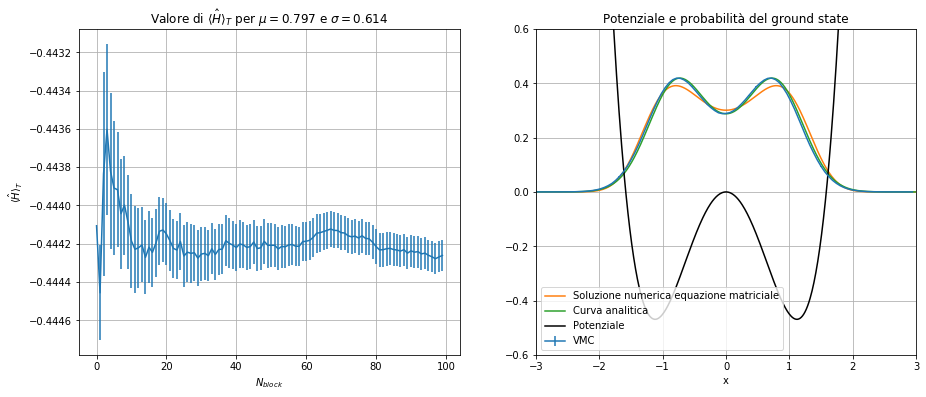

In [4]:
print("Energia di Ground state per metodo matriciale: ", E[0])
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
N_block, integral, err= np.loadtxt('Risultati/Integral.out', usecols=(0,1,2),unpack='true')
plt.errorbar(N_block,integral, err)
print("Energia di Ground state per metodo variazionale: ",  integral[len(integral)-1], " +/-", err[len(integral)-1])
plt.ylabel('$I$')
plt.grid(True)
plt.ylabel(r'$\langle {\hat H} \rangle_T$')
plt.xlabel('$N_{block}$')
plt.title(r'Valore di $\langle {\hat H} \rangle_T$ per $\mu = 0.797$ e $\sigma = 0.614$ ')

plt.subplot(1,2,2)
scale = 0.3
_mu = mu[np.argmin(Energy)]
_sigma = sigma[np.argmin(Energy)]
r, psi2, err_psi2= np.loadtxt('Risultati/Histogram_psi.out', usecols=(0,1,2),unpack='true')
plt.errorbar(r,psi2, err_psi2,label='VMC')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale')
plt.plot(x,Analitic_psi(x,_mu,_sigma), label = 'Curva analitica')
plt.plot(x, scale*V, color="Black", label="Potenziale") # plot the potential
plt.title("Potenziale e probabilità del ground state")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

### Exercise 08.3

In questo esercizio la funzione d'onda del *ground state* è stata ricavata con il metodo del *path integral*, usando come stati di prova due funzioni d'onda diverse: $\Psi_T=1 $ e $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$ (per quest'ultima ho adottato come valori di $\mu$ e $\sigma$ quelli ottimizzati). Come risultati si ottengono funzioni d'onda del *ground state* simili e compatibili con quella che risolve l'equazione di Schrodinger in forma matriciale. 

Infine utilizzando i *path integral* Monte Carlo ho osservato la variazione della funzione d'onda, ottenuta da $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$, quando il sistema si trova  a $T > 0K$ per cui non solo il *ground state* può essere occupato.

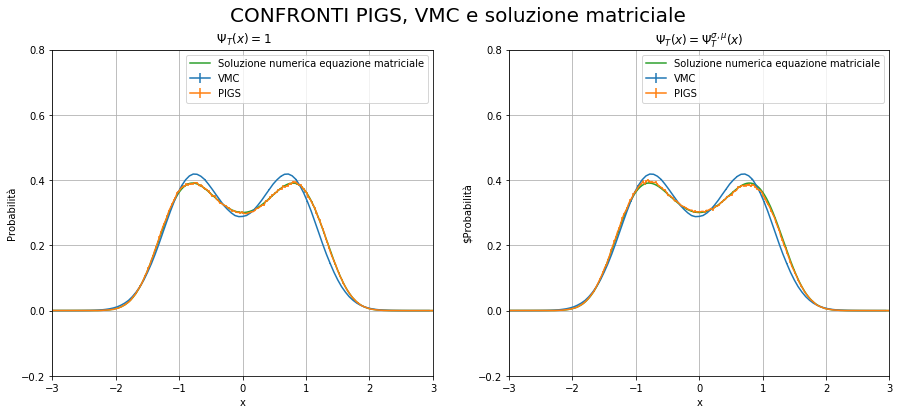

In [5]:
x_pigs1, pigs1, err_pigs1= np.loadtxt('Risultati/probability_pigs_psi1.dat', usecols=(0,1,2),unpack='true')
x_pigsT, pigsT, err_pigsT= np.loadtxt('Risultati/probability_pigs_psiT.dat', usecols=(0,1,2),unpack='true')

plt.figure(figsize=(15,6))
plt.suptitle('CONFRONTI PIGS, VMC e soluzione matriciale',fontsize=20)

plt.subplot(1,2,1)
plt.errorbar(r,psi2, err_psi2,label='VMC')
plt.errorbar(x_pigs1, pigs1, err_pigs1,label = 'PIGS')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale')
plt.title(r" $\Psi_T(x)=1$")
plt.ylabel(r'Probabilità')
plt.xlabel("x")
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(r,psi2, err_psi2,label='VMC')
plt.errorbar(x_pigsT, pigsT, err_pigsT,label = 'PIGS')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale')
plt.title(r"$\Psi_T(x)= \Psi_T^{\sigma,\mu}(x)$")
plt.ylabel(r'$Probabilità')
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.xlabel("x")
plt.grid(True)

plt.show()

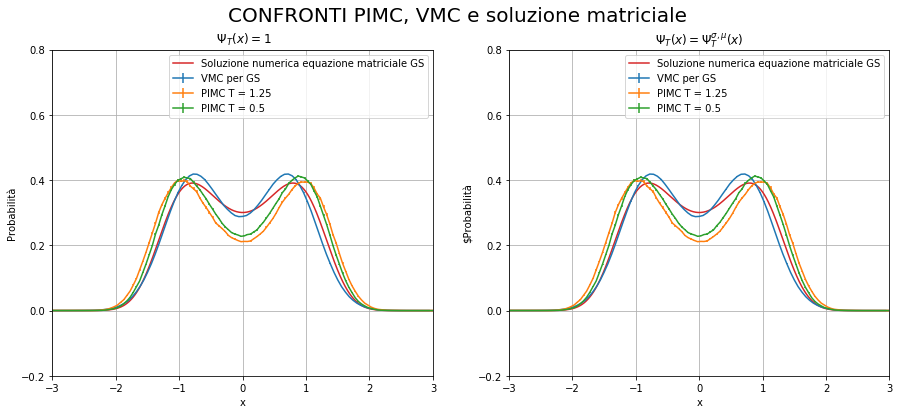

In [6]:
x_pimc1, pimc1, err_pimc1= np.loadtxt('Risultati/probability_pimc1.25_psi1.dat', usecols=(0,1,2),unpack='true')
x_pimcT, pimcT, err_pimcT= np.loadtxt('Risultati/probability_pimc1.25_psiT.dat', usecols=(0,1,2),unpack='true')

x_pimc12, pimc12, err_pimc12= np.loadtxt('Risultati/probability_pimc_psi1.dat', usecols=(0,1,2),unpack='true')
x_pimcT2, pimcT2, err_pimcT2= np.loadtxt('Risultati/probability_pimc_psiT.dat', usecols=(0,1,2),unpack='true')

plt.figure(figsize=(15,6))
plt.suptitle('CONFRONTI PIMC, VMC e soluzione matriciale',fontsize=20)

plt.subplot(1,2,1)
plt.errorbar(r,psi2, err_psi2,label='VMC per GS')
plt.errorbar(x_pimc1, pimc1, err_pimc1,label = 'PIMC T = 1.25')
plt.errorbar(x_pimc12, pimc12, err_pimc12,label = 'PIMC T = 0.5')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale GS')
plt.title(r" $\Psi_T(x)=1$")
plt.ylabel(r'Probabilità')
plt.xlabel("x")
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(r,psi2, err_psi2,label='VMC per GS')
plt.errorbar(x_pimcT, pimcT, err_pimcT,label = 'PIMC T = 1.25')
plt.errorbar(x_pimcT2, pimcT2, err_pimcT2,label = 'PIMC T = 0.5')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica equazione matriciale GS')
plt.title(r"$\Psi_T(x)= \Psi_T^{\sigma,\mu}(x)$")
plt.ylabel(r'$Probabilità')
plt.xlim((-3,3))
plt.ylim((-0.2,0.8))
plt.legend()
plt.xlabel("x")
plt.grid(True)

plt.show()

I risultati appena presentati per PIGS e PIMC sono stati ottenuti adottando un *imaginary time propagation* $\tau=8$. Ho in seguito verificato, per il codice PIGS, quanto mi fosse possibile ridurre questo parametro mantenendo dei risultati soddisfacenti. Per il caso $\Psi_T=1 $, a $\tau = 3$ l'approssimazione del GS cominciava a non essere più precisa, mentre per $\Psi_T= \Psi_T^{\sigma,\mu}(x)$ ho raggiunto $\tau = 0.1$ (di sotto allego i relativi grafici). Ciò conferma il fatto che se parto da una funzione simile a quella del GS del sistema, il *path integral* richiede poche proiezioni tra *bra* e *ket* per convergere al risultato corretto.

<img src="Risultati/Pigs_psi1_time3.png" width="500">
<img src="Risultati/Pigs_psiT_timea01.png" width="500">